In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

rate=pd.read_excel("movie_rate.xlsx")
movie=pd.read_csv("ALL_KC_KOBIS_BOX_OFFIC_MOVIE_INFO.csv")
movie=movie[(movie['GRAD_NM']!='청소년관람불가') & (movie['NLTY_NM']=='한국')]

In [4]:
rate

,NO,제목,url,평론가 평점,네티즌 평점
0,1,산상수훈,https://movie.naver.com/movie/bi/mi/basic.nave...,3.00,6.30
1,2,교회오빠,https://movie.naver.com/movie/bi/mi/basic.nave...,NaN,9.31
2,3,기생충,https://movie.naver.com/movie/bi/mi/basic.nave...,9.06,8.49
3,4,엑시트,https://movie.naver.com/movie/bi/mi/basic.nave...,NaN,NaN
4,5,김복동,https://movie.naver.com/movie/bi/mi/basic.nave...,6.60,8.83
...,...,...,...,...,...
548,549,정직한 후보2,https://movie.naver.com/movie/bi/mi/basic.nave...,5.75,5.99
549,550,주연,https://movie.naver.com/movie/bi/mi/basic.nave...,NaN,8.04
550,551,쥬라기캅스 극장판: 공룡시대 대모험,https://movie.naver.com/movie/bi/mi/basic.nave...,6.00,7.59
551,552,프린세스 아야,https://movie.naver.com/movie/bi/mi/basic.nave...,5.00,7.38


In [5]:
movie

,NO,MOVIE_NM,DRCTR_NM,MAKR_NM,INCME_CMPNY_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,SALES_PRICE,VIEWNG_NMPR_CO,SEOUL_SALES_PRICE,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM
0,1,산상수훈,유영의,(주)그란,NaN,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,3.206000e+06,284.0,3206000.0,284.0,드라마,전체관람가,독립/예술영화
1,2,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",NaN,커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,1.499000e+06,154.0,1499000.0,154.0,다큐멘터리,전체관람가,독립/예술영화
3,4,기생충,봉준호,(주)바른손이앤에이,NaN,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,1.575865e+09,227811.0,684991280.0,97354.0,드라마,15세이상관람가,일반영화
6,7,엑시트,이상근,"(주)외유내강,(주)필름케이",NaN,(주)씨제이이엔엠,20190731,개봉영화,장편,한국,1660.0,2.000000e+05,40.0,0.0,0.0,코미디,12세이상관람가,일반영화
7,8,김복동,송원근,한국탐사저널리즘센터,NaN,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,7.700000e+05,110.0,0.0,0.0,다큐멘터리,12세이상관람가,독립/예술영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933,4934,정직한 후보2,장유정,"(주)수필름,(주)홍필름",NaN,(주)넥스트엔터테인먼트월드(NEW),2022-09-,개봉영화,장편,한국,NaN,NaN,NaN,NaN,NaN,코미디,12세이상관람가,일반영화
4935,4936,주연,송원준,영화사 퐑,NaN,(주)마노엔터테인먼트,2022-09-,개봉영화,장편,한국,20.0,NaN,363.0,NaN,302.0,드라마,12세이상관람가,독립/예술영화
4938,4939,쥬라기캅스 극장판: 공룡시대 대모험,김호락,(주)스튜디오버튼,NaN,메가박스중앙(주)플러스엠,2022-09-,개봉영화,장편,한국,453.0,NaN,NaN,NaN,NaN,애니메이션,전체관람가,일반영화
4949,4950,프린세스 아야,이성강,"주식회사 다다쇼,(주)영화사레드피터",NaN,씨제이 씨지브이(CJ CGV)(주),2022-09-,개봉영화,장편,한국,348.0,NaN,NaN,NaN,NaN,판타지,전체관람가,일반영화


In [6]:
movie['DISTB_CMPNY_NM'].unique()

array(['이언픽쳐스,(주)그란', '커넥트픽쳐스(주)', '(주)씨제이이엔엠', '(주)엣나인필름', '(주)영화사 진진',
       '(주)엣나인필름,(주)콘텐츠판다', '(주)엣나인필름,CGV아트하우스', '(재)CBS,주식회사 마운틴픽쳐스',
       '롯데컬처웍스(주)롯데엔터테인먼트', '(주)시네마달', '(주)에이스메이커무비웍스',
       '(주)씨네포트,주식회사 마운틴픽쳐스', '(주)리틀빅픽쳐스', '(주)삼백상회', '(주)트리플픽쳐스',
       '주식회사 마운틴픽쳐스', '씨네마캣 픽쳐스', 'CGV아트하우스', '메가박스중앙(주)플러스엠', '(주)이수C&E',
       'KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)', '케이티하이텔(주)', '(주)드림팩트엔터테인먼트',
       '㈜인디스토리', '(주)넥스트엔터테인먼트월드(NEW)', '영화배급협동조합 씨네소파',
       '(주)씨제이이엔엠,(주)덱스터스튜디오', '(주)케이알씨지', '(주)영화사 그램', '주식회사 씨엠닉스',
       '(주)미로스페이스', '(주)영화특별시에스엠씨', '(주)쇼박스', '메가박스중앙(주)플러스엠,(주)리틀빅픽쳐스',
       '아이 엠', '스마트스터디(주)', '(주)랠리버튼', '영화사 무명', '찬란', '아이 엠,케이티하이텔(주)',
       '제이리미디어', '주식회사 블루필름웍스', '(주)아이디어랩', '(주)그노스', '한국문화예술위원회',
       '(주)스톰픽쳐스코리아,(주)삼백상회', '(주)유비네트워크', '(유)조이앤시네마,(주)제이앤씨미디어그룹',
       '(주)마노엔터테인먼트', '영화사 삼순', '(주)스마일이엔티', '(주)영화사오원', '(주)에스와이코마드',
       '(주)좋은 하늘,(주)박수엔터테인먼트', '(주)피터팬픽쳐스', '매치컷(주)', '에이 라이프',
       '(주)퍼스트런,(주)키다리이엔티', '영화사 풀,(주)영화사 친구', '

In [7]:
#유통사 앞의 하나만 사용
movie['DISTB_CMPNY_NM']

0               이언픽쳐스,(주)그란
1                 커넥트픽쳐스(주)
3                 (주)씨제이이엔엠
6                 (주)씨제이이엔엠
7                  (주)엣나인필름
               ...         
4933    (주)넥스트엔터테인먼트월드(NEW)
4935            (주)마노엔터테인먼트
4938          메가박스중앙(주)플러스엠
4949    씨제이 씨지브이(CJ CGV)(주)
4953             그린나래미디어(주)
Name: DISTB_CMPNY_NM, Length: 553, dtype: object

In [8]:
movie['DISTB_CMPNY_NM']=movie['DISTB_CMPNY_NM'].apply(lambda x: str(x).split(',')[0])

In [9]:
movie['DISTB_CMPNY_NM']

0                     이언픽쳐스
1                 커넥트픽쳐스(주)
3                 (주)씨제이이엔엠
6                 (주)씨제이이엔엠
7                  (주)엣나인필름
               ...         
4933    (주)넥스트엔터테인먼트월드(NEW)
4935            (주)마노엔터테인먼트
4938          메가박스중앙(주)플러스엠
4949    씨제이 씨지브이(CJ CGV)(주)
4953             그린나래미디어(주)
Name: DISTB_CMPNY_NM, Length: 553, dtype: object

In [10]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

C:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


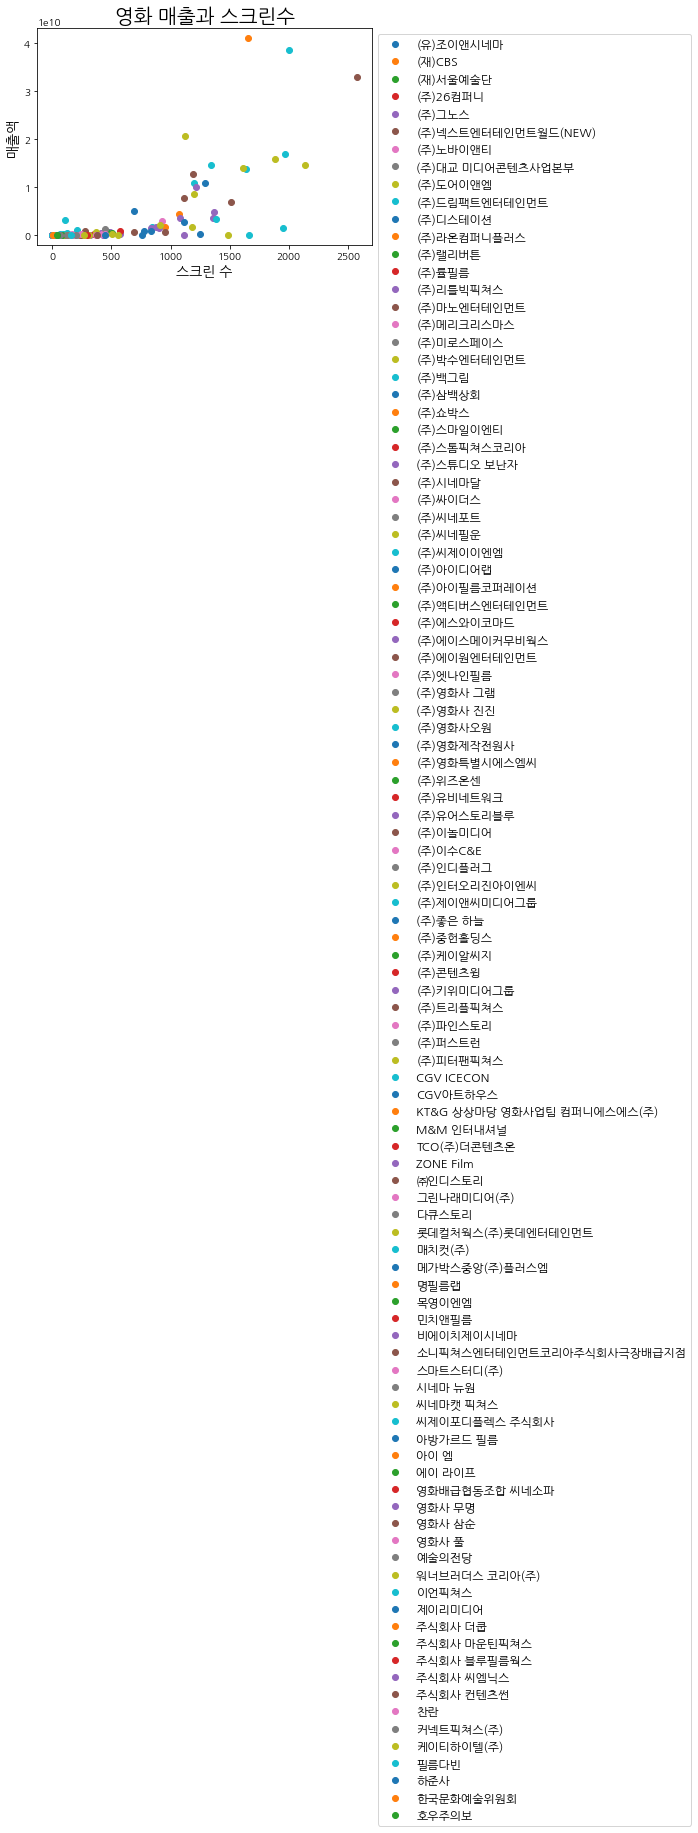

In [11]:
import matplotlib.pyplot as plt
screenPrice=movie[movie['SALES_PRICE'].notna()]
groups = screenPrice.groupby('DISTB_CMPNY_NM')

fig, ax = plt.subplots()
for DISTB_CMPNY_NM, group in groups:
    ax.plot(group.TOT_SCRN_CO, 
            group.SALES_PRICE , 
            marker='o', 
            linestyle='',
            label=DISTB_CMPNY_NM)
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position

plt.title('영화 매출과 스크린수', fontsize=20)

plt.xlabel('스크린 수', fontsize=14)

plt.ylabel('매출액', fontsize=14)

plt.show()

In [12]:
len(movie['DISTB_CMPNY_NM'].unique())

148

In [13]:
sum(movie['SALES_PRICE'].notna())

272

In [14]:
len(movie['DISTB_CMPNY_NM'])

553

In [21]:
print(groups.size())
max(groups.size())

DISTB_CMPNY_NM
(유)조이앤시네마    1
(재)CBS       1
(재)서울예술단     1
(주)26컴퍼니     2
(주)그노스       2
            ..
케이티하이텔(주)    2
필름다빈         5
하준사          1
한국문화예술위원회    2
호우주의보        1
Length: 103, dtype: int64


14

In [18]:
from scipy.stats import shapiro
#정규분포인지 확인 - 둘다 비정규
print(shapiro(screenPrice['SALES_PRICE'].dropna().values))
print(shapiro(screenPrice['TOT_SCRN_CO'].dropna().values))

ShapiroResult(statistic=0.29596585035324097, pvalue=6.340069688363416e-31)
ShapiroResult(statistic=0.6365132927894592, pvalue=1.1522648273404511e-23)


In [19]:
#연속형-연속형, 비모수이므로 spearman 사용해서 분석
print(stats.spearmanr(screenPrice['SALES_PRICE'],screenPrice['TOT_SCRN_CO']))

SpearmanrResult(correlation=0.801947126406647, pvalue=2.3521206609749387e-62)
